In [10]:
import pandas as pd
from pandas import DataFrame
from pandas import read_csv, pivot_table
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [11]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('submission.csv')
print(train.shape, test.shape, submission.shape)

(891, 12) (418, 11) (418, 2)


In [13]:
# 데이터 확인
print(train.head(3))
print(test.head(3))
print(submission.head(3))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
   PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2          894       2         Myles, Mr. Thomas Francis    male  62.0      0   

   Parch 

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
train.describe(include='all') # include='all'은 문자열에 대해서도 통계를 내준다.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


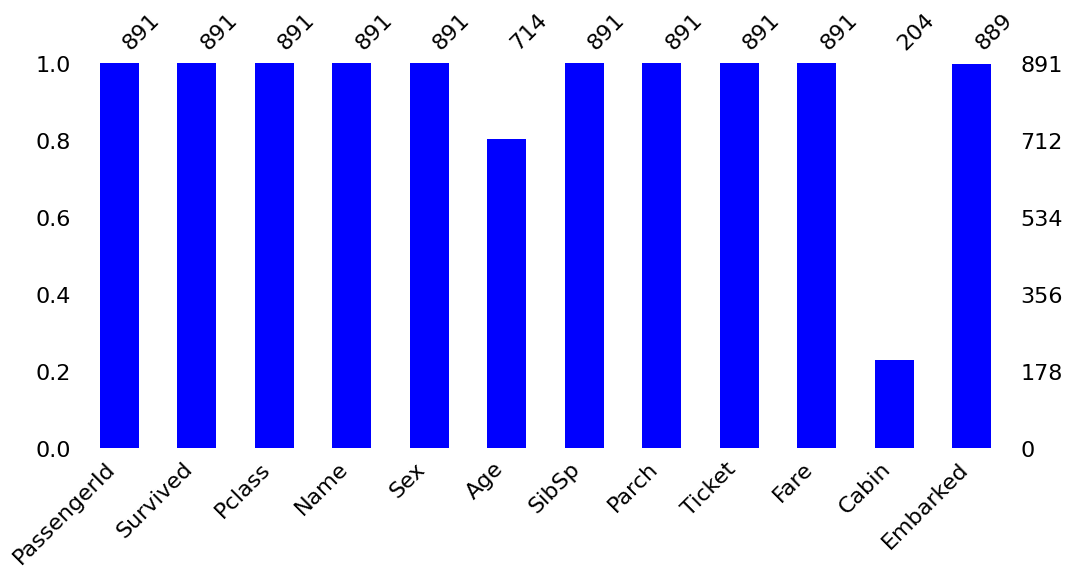

In [16]:
import missingno as msno
msno.bar(train, figsize=(12, 5), color='blue')
plt.show()

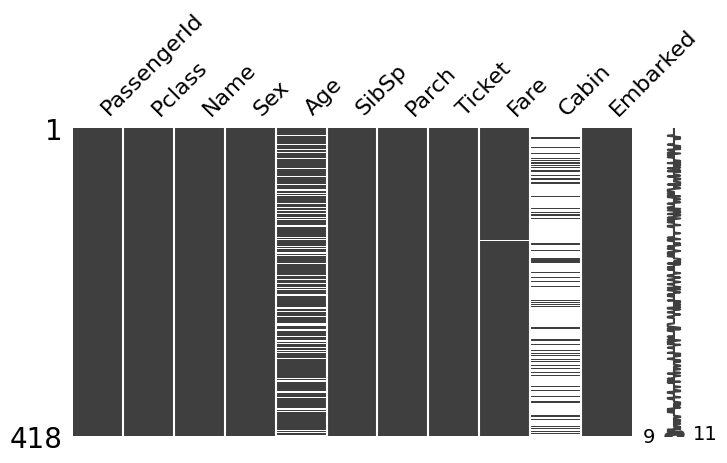

     PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0              1         0       3  22.0      1      0   7.2500
1              2         1       1  38.0      1      0  71.2833
2              3         1       3  26.0      0      0   7.9250
3              4         1       1  35.0      1      0  53.1000
4              5         0       3  35.0      0      0   8.0500
..           ...       ...     ...   ...    ...    ...      ...
886          887         0       2  27.0      0      0  13.0000
887          888         1       1  19.0      0      0  30.0000
888          889         0       3   NaN      1      2  23.4500
889          890         1       1  26.0      0      0  30.0000
890          891         0       3  32.0      0      0   7.7500

[891 rows x 7 columns]


In [17]:
msno.matrix(test, figsize=(8,4))
plt.show()
train1 = train.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
print(train1)

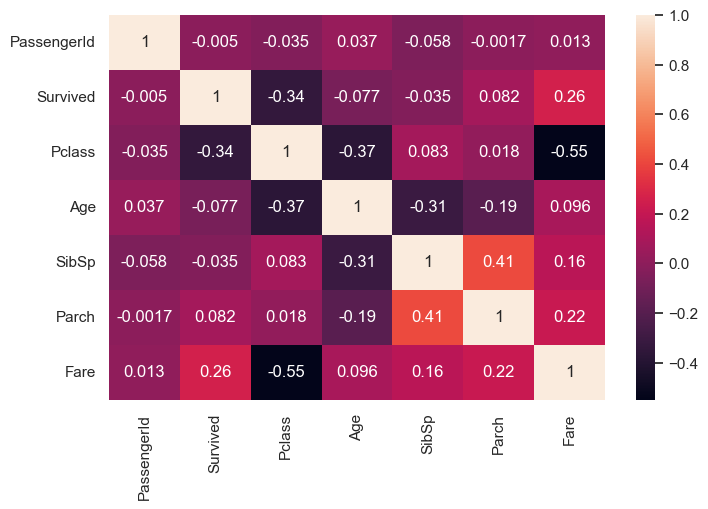

In [18]:
# 숫자형 변수 간의 상관 관계를 계산하여 히트맵 그리기
plt.figure(figsize=(8,5))
sns.set(font_scale=1.0)
sns.heatmap(train1.corr(), annot=True, cbar=True)
plt.show()

In [19]:
# concat 함수로 데이터프레임(trian, test)을 위 아래 방향(axis=0)으로 연결한다.
# train 데이터와 test 데이터를 구분하기 위해 TrainSplit열을 추가하고 
# train과 test를 값으로 지정한다.
# 타이타닉 전체 데이터셋 준비 
train['TrainSplit'] = 'Train'
test['TrainSplit'] = 'Test'
data = pd.concat([train, test], axis=0)
print(data)

     PassengerId  Survived  Pclass  \
0              1       0.0       3   
1              2       1.0       1   
2              3       1.0       3   
3              4       1.0       1   
4              5       0.0       3   
..           ...       ...     ...   
413         1305       NaN       3   
414         1306       NaN       1   
415         1307       NaN       3   
416         1308       NaN       3   
417         1309       NaN       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [20]:
# 가장 먼저 숫자형 데이터를 가진열을 추가하고 data-num 변수에 저장한다.
# fillna() 메소드를 사용하여 'Age'열의 결측값을 평균값으로 대체한다.
# 'Fare'열의 결측값은 가장 빈도수가 많은 값으로 대체한다(최빈값)

# 숫자형 피처 추출
data_num = data.loc[:, ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]

# 결측값 대체
data_num['Age'] = data_num['Age'].fillna(data_num['Age'].mean())
data_num['Fare'] = data_num['Fare'].fillna(data_num['Fare'].mode()[0])

# 학습용 데이터와 예측 대상인 테스트 데이터 구분
selected_feature = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
x_train = data_num.loc[data['TrainSplit']=='Train', selected_feature]
y_train = data_num.loc[data['TrainSplit']=='Train', 'Survived']

x_test = data_num.loc[data['TrainSplit']=='Test', selected_feature]

print("Train 데이터셋 크기 :", x_train.shape, y_train.shape)
print("Test 데이터셋 크기 :", x_test.shape)

Train 데이터셋 크기 : (891, 5) (891,)
Test 데이터셋 크기 : (418, 5)


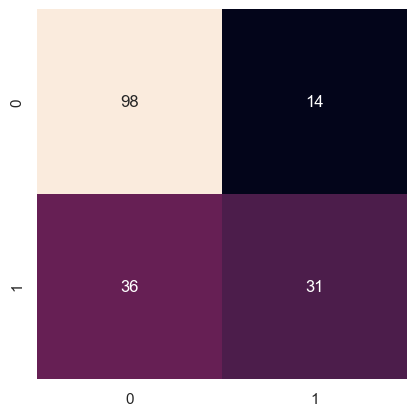

In [21]:
# 훈련 데이터 - 검증 데이터 분할
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.2, shuffle=True, random_state=20)

# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_tr, y_tr)
y_val_pred = lr_model.predict(x_val)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, cbar=False, square=True)
# cbar를 통해 colorbar의 유무를 정해줄 수 있다.
# linewidths 각 cell마다 선을 넣어주고 굵기를 정할 수 있다.
# annot 각 cell의 값을 표기할 수 있다. 이때 fmt를 이용해 각 cell의 값의 데이터 형태를 지정해주는 과정이 필요할 수 있다.
# vmin, vmax로 색으로 최대값, 최소값을 표현할 수 있다. ex) vmin=200, vmax=500
plt.show()

In [22]:
# 평가지표
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
print("Accuracy:%.4f" % accuracy_score(y_val, y_val_pred))
print("Precision:%.4f" % precision_score(y_val, y_val_pred)) # 정밀도
print("Recall:%.4f" % recall_score(y_val, y_val_pred)) # 재현율
print("F1:%.4f" % f1_score(y_val, y_val_pred)) # 정확도와 재현율의 조화
print("AUC:%.4f" % roc_auc_score(y_val, y_val_pred)) # 데이콘 경진대회에서 사용하는 평가지표 1에가까울소록 좋은 모델링

Accuracy:0.7207
Precision:0.6889
Recall:0.4627
F1:0.5536
AUC:0.6688


In [23]:
# test 데이터에 대한 예측값 정리
y_test_pred =lr_model.predict(x_test)

# 제출 양식에 맞게 정리
submission['Survived'] = y_test_pred.astype(int)

# 제출파일 저장
# submission_filepath = drive_path + 'baseline_num_lr_submission_001.csv'
# submission, to_csv(submission_filepath, index=False)
# submission.head(5)

In [24]:
# 타킷 레이블의 분포 확인
train['Survived'].value_counts(dropna=False)

Survived
0    549
1    342
Name: count, dtype: int64

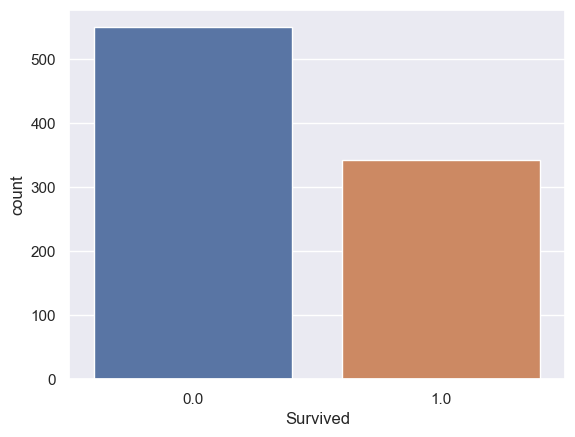

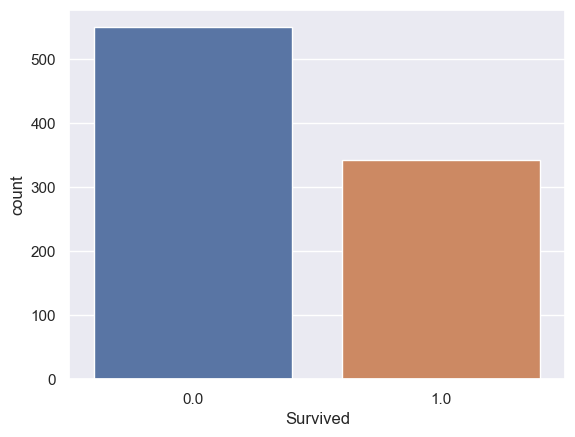

In [25]:
# 사본 countplot으로 생존자(class 1)와 사망자(class 0)의 분포를 비교한다.
# TrainSplit 열을 이용하여 train 데이터만 따로 추출하여 적용한다.

# 객실 등급별 분포 확인
sns.countplot(x='Survived', data=data) #[data['TrainSplit']=='Train'])
plt.show()
sns.countplot(x='Survived', data=data[data['TrainSplit']=='Train'])
plt.show()

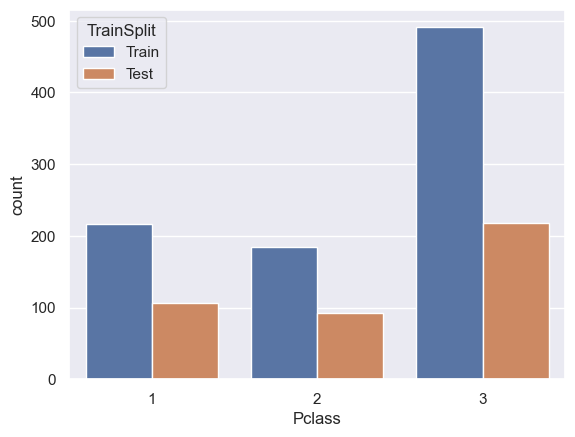

In [26]:
# train - test 데이터 분포
sns.countplot(x='Pclass', hue='TrainSplit', data=data)
plt.show()

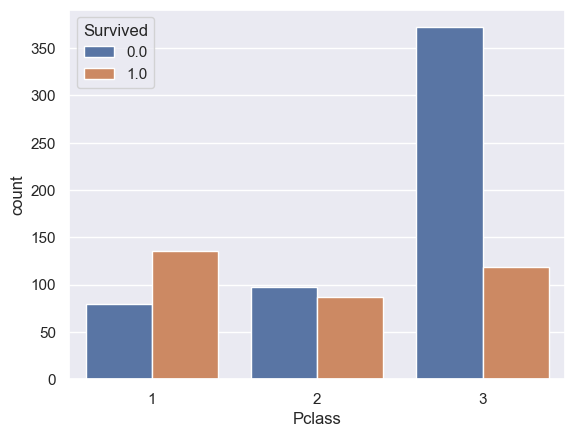

In [27]:
# train 데이터 중에서 객실 등급에 따른 생존자 비율을 살펴본다.
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.show()

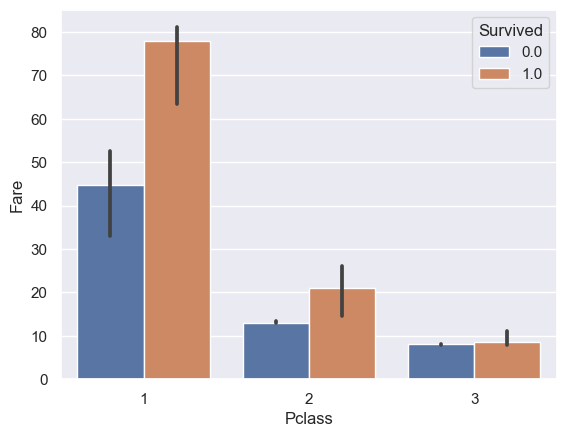

In [28]:
# 이번에는 barplot 함수를 사용해 등급별 객실 요금의 중간값 분포를 알아본다.

# Pclass 별 Fare 객실 요금의 중간값 비교
sns.barplot(x='Pclass', y='Fare', hue='Survived', data=data, estimator=np.median)
# estimator 표집값들로 부터 모수의 값을 추정하는 방법
plt.show()

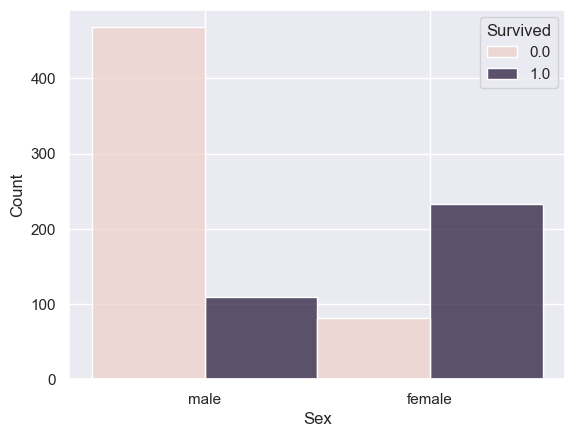

In [29]:
# histplot 함수 - dodge 옵션
sns.histplot(x='Sex', hue='Survived', multiple='dodge', data=data)
plt.show()

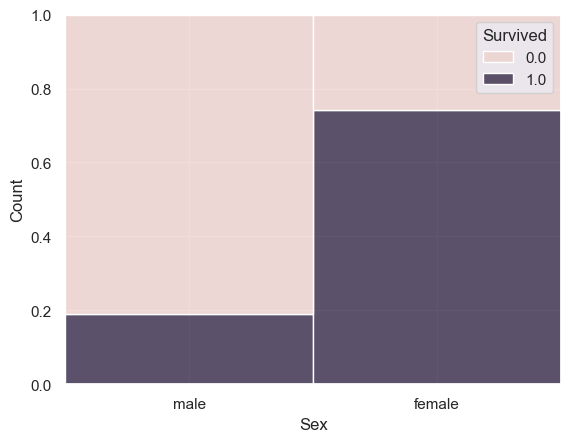

In [30]:
# multiple 속성에 fill 옵션을 설정하면 hue 속성의 상대적 비율을 백분율로 표시한다.

# histplot 함수 - fill 옵션
sns.histplot(x='Sex', hue='Survived', data=data, multiple='fill')
plt.show()

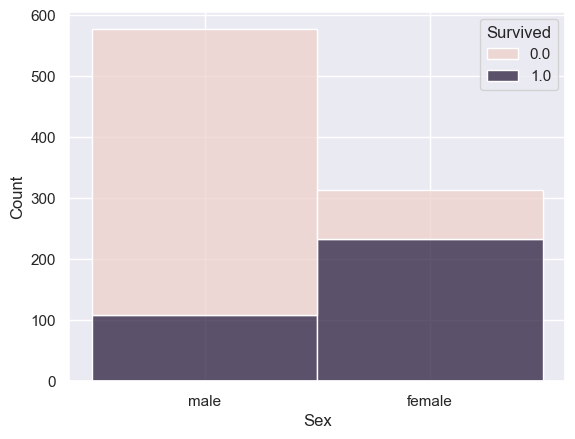

In [31]:
# histplot 함수 - stack 옵션
# 그래프를 상하 방향으로 누적하여 나타낸다.
sns.histplot(x='Sex', hue='Survived', multiple='stack', data=data)
plt.show()

In [ ]:
# 레이블 인코딩(femail = 0, male = 1)

data.loc[data['Sex'] == 'female', 'Sex'] = 0
data.loc[data['Sex'] == 'male', 'Sex'] = 1
data['Sex'] = data['Sex'].astype(int)

# 성별 분포 확인
data['Sex'].value_counts(dropna=False)